In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import seaborn as sns

In [2]:
states_df = pd.read_excel('./Main.xlsx')

In [3]:
states_df.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [4]:
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area Name                    35 non-null     object 
 1   Illiterate                   35 non-null     int64  
 2   Graduate & above             35 non-null     int64  
 3   Total - Population           35 non-null     int64  
 4   Percentage Illiterate        35 non-null     float64
 5   Percentage Graduate & above  35 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ KB


In [5]:
states_df_dummies = pd.get_dummies(states_df,columns=['Area Name'],drop_first=True)

In [6]:
states_df_dummies.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above,Area Name_State - ANDHRA PRADESH,Area Name_State - ARUNACHAL PRADESH,Area Name_State - ASSAM,Area Name_State - BIHAR,Area Name_State - CHANDIGARH,...,Area Name_State - ODISHA,Area Name_State - PUDUCHERRY,Area Name_State - PUNJAB,Area Name_State - RAJASTHAN,Area Name_State - SIKKIM,Area Name_State - TAMIL NADU,Area Name_State - TRIPURA,Area Name_State - UTTAR PRADESH,Area Name_State - UTTARAKHAND,Area Name_State - WEST BENGAL
0,3378518,385463,12541302,26.939133,3.073549,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,963742,267936,6864602,14.039299,3.903154,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4886265,979525,27743338,17.612390,3.530667,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,175200,91276,1055450,16.599555,8.648065,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1929236,525301,10086292,19.127307,5.208069,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
states_df_dummies.columns

Index(['Illiterate', 'Graduate & above', 'Total - Population',
       'Percentage Illiterate', 'Percentage Graduate & above',
       'Area Name_State - ANDHRA PRADESH',
       'Area Name_State - ARUNACHAL PRADESH', 'Area Name_State - ASSAM',
       'Area Name_State - BIHAR', 'Area Name_State - CHANDIGARH',
       'Area Name_State - CHHATTISGARH',
       'Area Name_State - DADRA & NAGAR HAVELI',
       'Area Name_State - DAMAN & DIU', 'Area Name_State - GOA',
       'Area Name_State - GUJARAT', 'Area Name_State - HARYANA',
       'Area Name_State - HIMACHAL PRADESH',
       'Area Name_State - JAMMU & KASHMIR', 'Area Name_State - JHARKHAND',
       'Area Name_State - KARNATAKA', 'Area Name_State - KERALA',
       'Area Name_State - LAKSHADWEEP', 'Area Name_State - MADHYA PRADESH',
       'Area Name_State - MAHARASHTRA', 'Area Name_State - MANIPUR',
       'Area Name_State - MEGHALAYA', 'Area Name_State - MIZORAM',
       'Area Name_State - NAGALAND', 'Area Name_State - NCT OF DELHI',
   

In [8]:
# outlier Removal

def remove_outliers_by_column(data,column):

    Q1 = data[column].quantile(0.05)
    Q3 = data[column].quantile(0.95)
    IQR = Q3 - Q1
    data = data[(data[column] >= Q1 - 1.5*IQR) & (data[column] <= Q3 + 1.5*IQR)]

    return data

In [9]:
outlier_cols = ['Illiterate','Graduate & above','Total - Population','Percentage Illiterate','Percentage Graduate & above']

for col in outlier_cols:
    states_df_dummies = remove_outliers_by_column(states_df_dummies,col)

In [10]:
states_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Illiterate                              35 non-null     int64  
 1   Graduate & above                        35 non-null     int64  
 2   Total - Population                      35 non-null     int64  
 3   Percentage Illiterate                   35 non-null     float64
 4   Percentage Graduate & above             35 non-null     float64
 5   Area Name_State - ANDHRA PRADESH        35 non-null     uint8  
 6   Area Name_State - ARUNACHAL PRADESH     35 non-null     uint8  
 7   Area Name_State - ASSAM                 35 non-null     uint8  
 8   Area Name_State - BIHAR                 35 non-null     uint8  
 9   Area Name_State - CHANDIGARH            35 non-null     uint8  
 10  Area Name_State - CHHATTISGARH          35 non-null     uint8  


In [11]:
# scaler = MinMaxScaler()

# # fit_transform
# states_df_scaled = scaler.fit_transform(states_df_dummies)
# states_df_scaled.shape

In [12]:
# states_df_scaled = pd.DataFrame(states_df_scaled)
# states_df_scaled.columns = states_df_dummies.columns
# states_df_scaled.head()

In [13]:
states_df_scaled = states_df_dummies

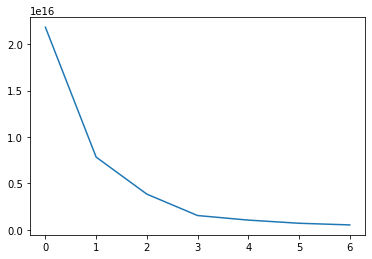

In [14]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(states_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [15]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(states_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(states_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.706560481470948
For n_clusters=3, the silhouette score is 0.710833369301319
For n_clusters=4, the silhouette score is 0.6800114779697448
For n_clusters=5, the silhouette score is 0.6768763180107973
For n_clusters=6, the silhouette score is 0.6759929392634488
For n_clusters=7, the silhouette score is 0.637915492839894
For n_clusters=8, the silhouette score is 0.624955050652203


In [16]:
# final model with k=3
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(states_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [17]:
# assign the label
states_df['cluster_id'] = kmeans.labels_
states_df.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above,cluster_id
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549,1
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154,1
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667,3
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065,1
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069,1


<AxesSubplot:xlabel='cluster_id', ylabel='Illiterate'>

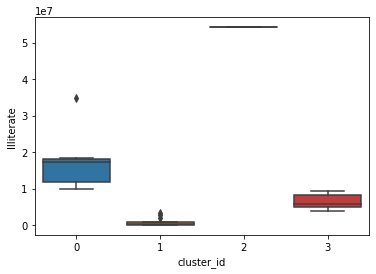

In [18]:
sns.boxplot(x='cluster_id', y='Illiterate', data=states_df)

<AxesSubplot:xlabel='cluster_id', ylabel='Graduate & above'>

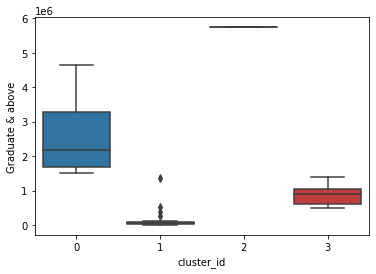

In [19]:
sns.boxplot(x='cluster_id', y='Graduate & above', data=states_df)

<AxesSubplot:xlabel='cluster_id', ylabel='Total - Population'>

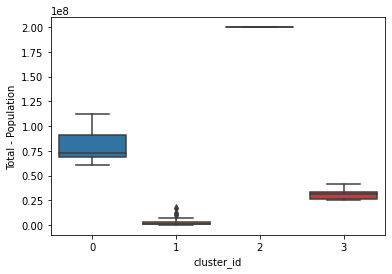

In [20]:
sns.boxplot(x='cluster_id', y='Total - Population', data=states_df)

<AxesSubplot:xlabel='cluster_id', ylabel='Percentage Illiterate'>

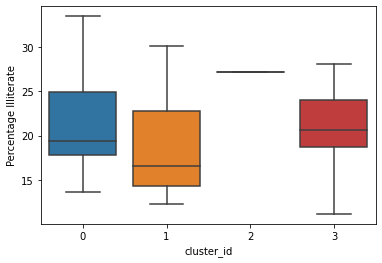

In [21]:
sns.boxplot(x='cluster_id', y='Percentage Illiterate', data=states_df)

<AxesSubplot:xlabel='cluster_id', ylabel='Percentage Graduate & above'>

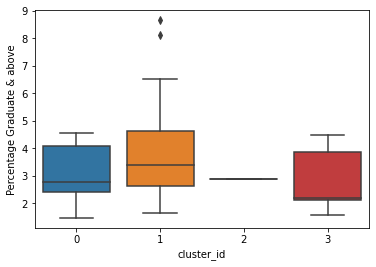

In [22]:
sns.boxplot(x='cluster_id', y='Percentage Graduate & above', data=states_df)